In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

rawData = pd.read_excel("C:\\Users\Brightness\Downloads\Expanding Issue Tree_test.xlsx", "Raw Data for Pulse Calculations")

#this prints the header information of the excel sheet containing the raw data
rawData.head(5)

,RowNumber,CustomerId,Surname,Geography,Gender,Age,Profession,Tenure,Balance (last week),Balance (today),...,HasCrCard,Loan amount this month,Loan age,Loan type,Due loan payment (this month),No of visits to bank this month,Enrolled to Mobile banking today,Deposits this month,EstimatedSalary,Salary account
0,2093,15757408,Lo,South West,Male,38,Skilled,3,275376.202392,250898.09,...,0,14335,1,Business,1148.751531,0,No,0.000000,81054.00,0
1,3281,15715622,To Rot,North Central,Female,57,Non-Skilled,3,168705.016176,238387.56,...,0,15758,2,Auto,0.000000,0,Yes,0.000000,147964.99,1
2,8734,15714241,Haddon,South West,Male,42,Skilled,9,115230.012462,222267.63,...,0,0,0,No Loan,0.000000,2,Yes,18135.954277,101108.85,1
3,3589,15571958,McIntosh,South West,Male,40,Non-Skilled,3,184308.943539,221532.80,...,1,0,0,No Loan,0.000000,2,Yes,1015.609661,171867.08,1
4,6718,15586674,Shaw,South West,Female,58,Skilled,5,141788.455066,216109.88,...,0,10145,2,Auto,0.000000,2,Yes,16181.368607,74176.71,0


In [2]:
'''
this counts the items on each column and helps to show if any row has missing or NaN data. 
The below shows that no column has any missing data
'''
rawData.count()

RowNumber                           10000
CustomerId                          10000
Surname                             10000
Geography                           10000
Gender                              10000
Age                                 10000
Profession                          10000
Tenure                              10000
Balance (last week)                 10000
Balance (today)                     10000
Number of accounts                  10000
HasCrCard                           10000
Loan amount this month              10000
Loan age                            10000
Loan type                           10000
Due loan payment (this month)       10000
No of visits to bank this month     10000
Enrolled to Mobile banking today    10000
Deposits this month                 10000
EstimatedSalary                     10000
Salary account                      10000
dtype: int64

#### Features engineering 

this involves selecting features that are important for this analysis.

Based on Towntalk's methodology, the following are the features required for calculating the pulse of the event

1. Geography
2. Gender
3. Age
4. Profession
5. Balance (last week)
6. Balance (today)

In [3]:
# columns not required are discarded

rawData.drop(['RowNumber', 'CustomerId', 'Surname','Tenure', 
              'Number of accounts', 'HasCrCard', 'Loan amount this month', 
              'Loan age','Loan type', 'Due loan payment (this month)',
              'No of visits to bank this month', 'Enrolled to Mobile banking today',
              'Deposits this month', 'EstimatedSalary', 'Salary account'], axis = 1, inplace = True)

In [4]:
#column headers of data to be used for the analysis
rawData.head(5)

,Geography,Gender,Age,Profession,Balance (last week),Balance (today)
0,South West,Male,38,Skilled,275376.202392,250898.09
1,North Central,Female,57,Non-Skilled,168705.016176,238387.56
2,South West,Male,42,Skilled,115230.012462,222267.63
3,South West,Male,40,Non-Skilled,184308.943539,221532.80
4,South West,Female,58,Skilled,141788.455066,216109.88


#### Segments and features description

The following segments and features are required for this analysis

1. Segments   ......                  2. Features
1. Profession    ......                 i. Skilled  ......          ii. Non-Skilled
2. Gender ......  i. Male  ......          ii. Female
3. Geography ......  i. North Central  ......          ii. South West  ...... iii. South East
4. Age ......  i. 18 to 30  ......          ii. 30 to 50  ...... iii. 50 to 75 ...... iii. 75 above

#### Class objects definition

This is essential to this analysis because it makes reading this notebook reasonable. One class object will be used to perform all analysis since the same method is used for calculating them. 

The following class arguments are defined:
##### class arguments created are cCount, sCount, fCount, X, X1, Y, fname, sname
##### class object is eventPulse
##### an instance of the class is fname =  eventpulse(cCount, sCount, fCount, X, X1, Y, fname, sname)
##### calling a method on an instance of the class is fname.methoddefined()
1. cCount is defined as total bank customers count
2. sCount is defined as total segmented count with balance greater than zero
3. fCount is defined as total feature count with balance greater than zero
4. X is average feature balance today
5. X1 is average feature balance last week
6. Y is average segment balance last week
7. fname is feature name
8. sname is segment name

Also, values of events from featurs are interpreted based on the below tables and defined within the class object <b> eventPulse.

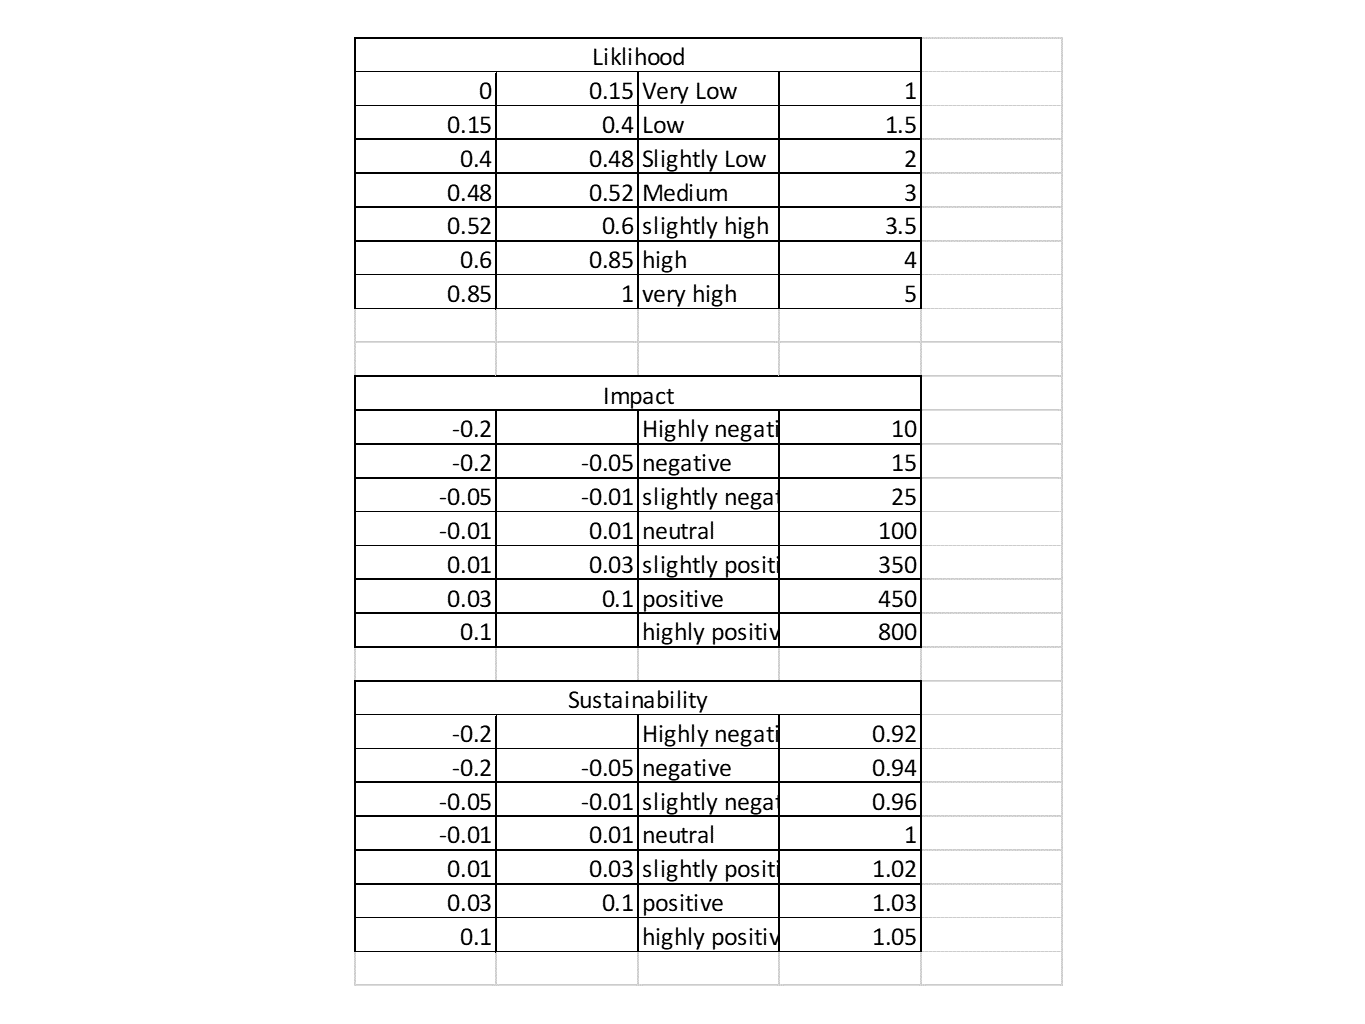

In [5]:
from IPython.display import Image
Image(filename="C:\\Users\Brightness\Downloads\Ope_pulse_test1.png")

In [6]:
class eventPulse():
    
    def __init__(self, cCount, sCount, fCount, X, X1, Y, fname, sname):
        self.cCount = cCount
        self.sCount = sCount
        self.fCount = fCount
        self.X = X
        self.X1 = X1
        self.Y = Y
        self.fname = fname
        self.sname = sname
        
    def confidenceInterval(self):
        CI = sCount/cCount
        return ("{} Confidence Interval is {}".format(sname, CI))
    
    def featureLikelihood(self):
        fL = (fCount/sCount)
        if fL>=0 and fL<=0.15:
            fL = 1
        elif fL>0.15 and fL<=0.4:
            fL = 1.5
        elif fL>0.4 and fL<=0.48:
            fL = 2
        elif fL>0.48 and fL<= 0.52:
            fL = 3
        elif fL>0.52 and fL<= 0.60:
            fL = 3.5
        elif fL>0.60 and fL<= 0.85:
            fL = 4
        else:
            fL>0.85 and fL<=1
            f = 5         
        return "Likelihood of {} event is {}".format(fname, fL)
    
    def featureAveragebalance(self):
        return "Average {} balance today is {} and last week is {}".format(fname, X, X1)
       # return "Average {} balance last week is {}".format(fname, X1)
    
    def segmentAveragebalance(self):
        return "Average {} balance today is {}".format(sname, Y)
    
    def featureImpact(self):
        fI = ((X - Y)/Y) 
        if fI<=-0.2:
            fI = 10
        elif fI>-0.2 and fI<=-0.05:
            fI = 15
        elif fI>-0.05 and fI<= -0.01:
            fI= 25
        elif fI>-0.01 and fI<= 0.01:
            fI = 100
        elif fI>0.01 and fI<= 0.03:
            fI = 350
        elif fI>0.03 and fI<= 0.10:
            fI= 450
        else:
            fI>0.1
            fI= 800
        return "{} impact is {} ".format(fname, fI)
        
    def featureSustainability(self):
        fS = ((X/X1)-1) 
        if fS< -0.2:
            fS= 0.92
        elif fS>=-0.2 and fS<=-0.05:
            fS= 0.94
        elif fS>=-0.05 and fS<= -0.01:
            fS= 0.96
        elif fS>=-0.01 and fS<= 0.01:
            fS= 1
        elif fS>=0.01 and fS<= 0.03:
            fS= 1.02
        elif fS>=0.03 and fS<= 0.10:
            fS= 1.03
        else:
            fS>0.1
            fS = 1.05 
        return "{} sustainability is {}".format(fname, fS)

##### Pulse of event by profession

Profession has two features: Skilled and Non-Skilled. Therefore two instances of class <b>eventPulse will be created.

In [7]:
# create instance of feature Skilled
todayData = rawData[rawData["Balance (today)"]>0] #segment data for today
lastweekData = rawData[rawData["Balance (last week)"]>0] #segment data for last week
fData= todayData[todayData["Profession"] == "Skilled"] # feature data today
flastweekData= lastweekData[lastweekData["Profession"] == "Skilled"] # feature data last week 
dfData = fData.describe() # summarized feature data today
dflastweekData = flastweekData.describe() # summarized feature data today
dsData = todayData.describe() # summarized segment data
cCount = len(rawData)
sCount = len(todayData) #is defined as total segmented count with balance greater than zero
fCount = len(todayData[todayData["Profession"] == "Skilled"]) 
X = dfData["Balance (today)"].loc["mean"] #is average feature balance today
X1 = dflastweekData["Balance (last week)"].loc["mean"] #is average feature balance last week
Y = dsData["Balance (today)"].loc["mean"]#is average segment balance last week
fname = "Skilled"
sname = "Profession"

skilled = eventPulse(cCount,sCount, fCount,X, X1,Y, fname, sname)

print(skilled.confidenceInterval())
print(skilled.featureLikelihood())
print(skilled.featureAveragebalance())
print(skilled.segmentAveragebalance())
print(skilled.featureImpact())
print(skilled.featureSustainability())
print("Count of {} is {}".format(fname, len(fData)))
print("Actual likelihood of {} is {}".format(fname,(fCount/sCount)))

Profession Confidence Interval is 0.8663
Likelihood of Skilled event is 3
Average Skilled balance today is 88047.88469804835 and last week is 86735.10158197151
Average Profession balance today is 88372.10179845293
Skilled impact is 100 
Skilled sustainability is 1.02
Count of Skilled is 4355
Actual likelihood of Skilled is 0.5027126861364424


In [8]:
#create instance for Non-Skilled

todayData = rawData[rawData["Balance (today)"]>0] #segment data for today
lastweekData = rawData[rawData["Balance (last week)"]>0] #segment data for last week
fData= todayData[todayData["Profession"] == "Non-Skilled"] # feature data today
flastweekData= lastweekData[lastweekData["Profession"] == "Non-Skilled"] # feature data last week 
dfData = fData.describe() # summarized feature data today
dflastweekData = flastweekData.describe() # summarized feature data today
dsData = todayData.describe() # summarized segment data
cCount = len(rawData)
sCount = len(todayData) #is defined as total segmented count with balance greater than zero
fCount = len(todayData[todayData["Profession"] == "Non-Skilled"]) 
X = dfData["Balance (today)"].loc["mean"] #is average feature balance today
X1 = dflastweekData["Balance (last week)"].loc["mean"] #is average feature balance last week
Y = dsData["Balance (today)"].loc["mean"]#is average segment balance last week
fname = "Non-Skilled"
sname = "Profession"

non_skilled = eventPulse(cCount,sCount, fCount,X, X1,Y, fname, sname)

print(non_skilled.confidenceInterval())
print(non_skilled.featureLikelihood())
print(non_skilled.featureAveragebalance())
print(non_skilled.segmentAveragebalance())
print(non_skilled.featureImpact())
print(non_skilled.featureSustainability())
print("Count of {} is {}".format(fname, len(fData)))
print("Actual likelihood of {} is {}".format(fname,(fCount/sCount)))

Profession Confidence Interval is 0.8663
Likelihood of Non-Skilled event is 3
Average Non-Skilled balance today is 88699.8560863512 and last week is 89311.27260682287
Average Profession balance today is 88372.10179845293
Non-Skilled impact is 100 
Non-Skilled sustainability is 1
Count of Non-Skilled is 4308
Actual likelihood of Non-Skilled is 0.4972873138635577


##### Pulse of event by gender

Gender has two features: Male and Female. Therefore two instances of class <b>eventPulse will be created.

In [9]:
# create instance of feature Male
todayData = rawData[rawData["Balance (today)"]>0] #segment data for today
lastweekData = rawData[rawData["Balance (last week)"]>0] #segment data for last week
fData= todayData[todayData["Gender"] == "Male"] # feature data today
flastweekData= lastweekData[lastweekData["Gender"] == "Male"] # feature data last week 
dfData = fData.describe() # summarized feature data today
dflastweekData = flastweekData.describe() # summarized feature data today
dsData = todayData.describe() # summarized segment data
cCount = len(rawData)
sCount = len(todayData) #is defined as total segmented count with balance greater than zero
fCount = len(todayData[todayData["Gender"] == "Male"]) 
X = dfData["Balance (today)"].loc["mean"] #is average feature balance today
X1 = dflastweekData["Balance (last week)"].loc["mean"] #is average feature balance last week
Y = dsData["Balance (today)"].loc["mean"]#is average segment balance last week
fname = "Male"
sname = "Gender"

male = eventPulse(cCount,sCount, fCount,X, X1,Y, fname, sname)

print(male.confidenceInterval())
print(male.featureLikelihood())
print(male.featureAveragebalance())
print(male.segmentAveragebalance())
print(male.featureImpact())
print(male.featureSustainability())
print("Count of {} is {}".format(fname, len(fData)))
print("Actual likelihood of {} is {}".format(fname,(fCount/sCount)))

Gender Confidence Interval is 0.8663
Likelihood of Male event is 3.5
Average Male balance today is 88800.64901622104 and last week is 89390.24300265367
Average Gender balance today is 88372.10179845293
Male impact is 100 
Male sustainability is 1
Count of Male is 4747
Actual likelihood of Male is 0.5479625995613528


In [10]:
# create instance of feature Female
todayData = rawData[rawData["Balance (today)"]>0] #segment data for today
lastweekData = rawData[rawData["Balance (last week)"]>0] #segment data for last week
fData= todayData[todayData["Gender"] == "Female"] # feature data today
flastweekData= lastweekData[lastweekData["Gender"] == "Female"] # feature data last week 
dfData = fData.describe() # summarized feature data today
dflastweekData = flastweekData.describe() # summarized feature data today
dsData = todayData.describe() # summarized segment data
cCount = len(rawData)
sCount = len(todayData) #is defined as total segmented count with balance greater than zero
fCount = len(todayData[todayData["Gender"] == "Female"]) 
X = dfData["Balance (today)"].loc["mean"] #is average feature balance today
X1 = dflastweekData["Balance (last week)"].loc["mean"] #is average feature balance last week
Y = dsData["Balance (today)"].loc["mean"]#is average segment balance last week
fname = "Female"
sname = "Gender"

female = eventPulse(cCount,sCount, fCount,X, X1,Y, fname, sname)

print(female.confidenceInterval())
print(female.featureLikelihood())
print(female.featureAveragebalance())
print(female.segmentAveragebalance())
print(female.featureImpact())
print(female.featureSustainability())
print("Count of {} is {}".format(fname, len(fData)))
print("Actual likelihood of {} is {}".format(fname,(fCount/sCount)))

Gender Confidence Interval is 0.8663
Likelihood of Female event is 2
Average Female balance today is 87852.61414708878 and last week is 86350.59414858688
Average Gender balance today is 88372.10179845293
Female impact is 100 
Female sustainability is 1.02
Count of Female is 3916
Actual likelihood of Female is 0.4520374004386471


##### Pulse of event by geography

geography has three features: North Central, South West and South East. Therefore three instances of class <b>eventPulse will be created. 

In [11]:
# create instance of feature North Central

todayData = rawData[rawData["Balance (today)"]>0] #segment data for today
lastweekData = rawData[rawData["Balance (last week)"]>0] #segment data for last week
fData= todayData[todayData["Geography"] == "North Central"] # feature data today
flastweekData= lastweekData[lastweekData["Geography"] == "North Central"] # feature data last week 
dfData = fData.describe() # summarized feature data today
dflastweekData = flastweekData.describe() # summarized feature data today
dsData = todayData.describe() # summarized segment data
cCount = len(rawData)
sCount = len(todayData) #is defined as total segmented count with balance greater than zero
fCount = len(todayData[todayData["Geography"] == "North Central"]) 
X = dfData["Balance (today)"].loc["mean"] #is average feature balance today
X1 = dflastweekData["Balance (last week)"].loc["mean"] #is average feature balance last week
Y = dsData["Balance (today)"].loc["mean"]#is average segment balance last week
fname = "North Central"
sname = "Geography"

NC = eventPulse(cCount,sCount, fCount,X, X1,Y, fname, sname)

print(NC.confidenceInterval())
print(NC.featureLikelihood())
print(NC.featureAveragebalance())
print(NC.segmentAveragebalance())
print(NC.featureImpact())
print(NC.featureSustainability())
print("Count of {} is {}".format(fname, len(fData)))
print("Actual likelihood of {} is {}".format(fname,(fCount/sCount)))

Geography Confidence Interval is 0.8663
Likelihood of North Central event is 1.5
Average North Central balance today is 93145.28744095653 and last week is 92320.75062813632
Average Geography balance today is 88372.10179845293
North Central impact is 450 
North Central sustainability is 1
Count of North Central is 3345
Actual likelihood of North Central is 0.38612489899572894


In [12]:
# create instance of feature South West

todayData = rawData[rawData["Balance (today)"]>0] #segment data for today
lastweekData = rawData[rawData["Balance (last week)"]>0] #segment data for last week
fData= todayData[todayData["Geography"] == "South West"] # feature data today
flastweekData= lastweekData[lastweekData["Geography"] == "South West"] # feature data last week 
dfData = fData.describe() # summarized feature data today
dflastweekData = flastweekData.describe() # summarized feature data today
dsData = todayData.describe() # summarized segment data
cCount = len(rawData)
sCount = len(todayData) #is defined as total segmented count with balance greater than zero
fCount = len(todayData[todayData["Geography"] == "South West"]) 
X = dfData["Balance (today)"].loc["mean"] #is average feature balance today
X1 = dflastweekData["Balance (last week)"].loc["mean"] #is average feature balance last week
Y = dsData["Balance (today)"].loc["mean"]#is average segment balance last week
fname = "South West"
sname = "Geography"

SW = eventPulse(cCount,sCount, fCount,X, X1,Y, fname, sname)

print(SW.confidenceInterval())
print(SW.featureLikelihood())
print(SW.featureAveragebalance())
print(SW.segmentAveragebalance())
print(SW.featureImpact())
print(SW.featureSustainability())
print("Count of {} is {}".format(fname, len(fData)))
print("Actual likelihood of {} is {}".format(fname,(fCount/sCount)))

Geography Confidence Interval is 0.8663
Likelihood of South West event is 1.5
Average South West balance today is 54679.127807048695 and last week is 54439.40127836178
Average Geography balance today is 88372.10179845293
South West impact is 10 
South West sustainability is 1
Count of South West is 2809
Actual likelihood of South West is 0.32425256839432065


In [13]:
# create instance of feature South East
todayData = rawData[rawData["Balance (today)"]>0] #segment data for today
lastweekData = rawData[rawData["Balance (last week)"]>0] #segment data for last week
fData= todayData[todayData["Geography"] == "South East"] # feature data today
flastweekData= lastweekData[lastweekData["Geography"] == "South East"] # feature data last week 
dfData = fData.describe() # summarized feature data today
dflastweekData = flastweekData.describe() # summarized feature data today
dsData = todayData.describe() # summarized segment data
cCount = len(rawData)
sCount = len(todayData) #is defined as total segmented count with balance greater than zero
fCount = len(todayData[todayData["Geography"] == "South East"]) 
X = dfData["Balance (today)"].loc["mean"] #is average feature balance today
X1 = dflastweekData["Balance (last week)"].loc["mean"] #is average feature balance last week
Y = dsData["Balance (today)"].loc["mean"]#is average segment balance last week
fname = "South East"
sname = "Geography"

SE = eventPulse(cCount,sCount, fCount,X, X1,Y, fname, sname)

print(SE.confidenceInterval())
print(SE.featureLikelihood())
print(SE.featureAveragebalance())
print(SE.segmentAveragebalance())
print(SE.featureImpact())
print(SE.featureSustainability())
print("Count of {} is {}".format(fname, len(fData)))
print("Actual likelihood of {} is {}".format(fname,(fCount/sCount)))

Geography Confidence Interval is 0.8663
Likelihood of South East event is 1.5
Average South East balance today is 119730.1161339179 and last week is 120240.35117963153
Average Geography balance today is 88372.10179845293
South East impact is 800 
South East sustainability is 1
Count of South East is 2509
Actual likelihood of South East is 0.28962253260995036


##### Pulse of event by Age

Age has 4 features: 
1. 18to30, 
2. 30to50, 
3. 50to75, 
4. 75above. 

Therefore four instances of class <b>eventPulse will be created.

In [15]:
# create instance of feature 18 to 30

todayData = rawData[rawData["Balance (today)"]>0] #segment data for today
lastweekData = rawData[rawData["Balance (last week)"]>0] #segment data for last week
fData= todayData[(todayData["Age"]>=18) & (todayData["Age"]<=30)] # feature data today
flastweekData= lastweekData[(lastweekData["Age"]>=18) & (lastweekData["Age"]<=30)] # feature data last week 
dfData = fData.describe() # summarized feature data today
dflastweekData = flastweekData.describe() # summarized feature data today
dsData = todayData.describe() # summarized segment data
cCount = len(rawData)
sCount = len(todayData) #is defined as total segmented count with balance greater than zero
fCount = len(fData) 
X = dfData["Balance (today)"].loc["mean"] #is average feature balance today
X1 = dflastweekData["Balance (last week)"].loc["mean"] #is average feature balance last week
Y = dsData["Balance (today)"].loc["mean"]#is average segment balance last week
fname = "Age 18 to 30"
sname = "Age"

A18to30 = eventPulse(cCount,sCount, fCount,X, X1,Y, fname, sname)

print(A18to30.confidenceInterval())
print(A18to30.featureLikelihood())
print(A18to30.featureAveragebalance())
print(A18to30.segmentAveragebalance())
print(A18to30.featureImpact())
print(A18to30.featureSustainability())
print("Count of {} is {}".format(fname, len(fData)))
print("Actual likelihood of {} is {}".format(fname,(fCount/sCount)))

Age Confidence Interval is 0.8663
Likelihood of Age 18 to 30 event is 1.5
Average Age 18 to 30 balance today is 85228.56835106378 and last week is 84861.1883642633
Average Age balance today is 88372.10179845293
Age 18 to 30 impact is 25 
Age 18 to 30 sustainability is 1
Count of Age 18 to 30 is 1692
Actual likelihood of Age 18 to 30 is 0.19531340182384854


In [16]:
# create instance of feature 30 to 50

todayData = rawData[rawData["Balance (today)"]>0] #segment data for today
lastweekData = rawData[rawData["Balance (last week)"]>0] #segment data for last week
fData= todayData[(todayData["Age"]>30) & (todayData["Age"]<=50)] # feature data today
flastweekData= lastweekData[(lastweekData["Age"]>30) & (lastweekData["Age"]<=50)] # feature data last week 
dfData = fData.describe() # summarized feature data today
dflastweekData = flastweekData.describe() # summarized feature data today
dsData = todayData.describe() # summarized segment data
cCount = len(rawData)
sCount = len(todayData) #is defined as total segmented count with balance greater than zero
fCount = len(fData) 
X = dfData["Balance (today)"].loc["mean"] #is average feature balance today
X1 = dflastweekData["Balance (last week)"].loc["mean"] #is average feature balance last week
Y = dsData["Balance (today)"].loc["mean"]#is average segment balance last week
fname = "Age 30 to 50"
sname = "Age"

A30to50 = eventPulse(cCount,sCount, fCount,X, X1,Y, fname, sname)

print(A30to50.confidenceInterval())
print(A30to50.featureLikelihood())
print(A30to50.featureAveragebalance())
print(A30to50.segmentAveragebalance())
print(A30to50.featureImpact())
print(A30to50.featureSustainability())
print("Count of {} is {}".format(fname, len(fData)))
print("Actual likelihood of {} is {}".format(fname,(fCount/sCount)))

Age Confidence Interval is 0.8663
Likelihood of Age 30 to 50 event is 4
Average Age 30 to 50 balance today is 89043.0689409754 and last week is 88585.87217832923
Average Age balance today is 88372.10179845293
Age 30 to 50 impact is 100 
Age 30 to 50 sustainability is 1
Count of Age 30 to 50 is 5845
Actual likelihood of Age 30 to 50 is 0.6747085305321482


In [26]:
# create instance of feature 50 to 75

todayData = rawData[rawData["Balance (today)"]>0] #segment data for today
lastweekData = rawData[rawData["Balance (last week)"]>0] #segment data for last week
fData= todayData[(todayData["Age"]>50) & (todayData["Age"]<=75)] # feature data today
flastweekData= lastweekData[(lastweekData["Age"]>50) & (lastweekData["Age"]<=75)] # feature data last week 
dfData = fData.describe() # summarized feature data today
dflastweekData = flastweekData.describe() # summarized feature data today
dsData = todayData.describe() # summarized segment data
cCount = len(rawData)
sCount = len(todayData) #is defined as total segmented count with balance greater than zero
fCount = len(fData) 
X = dfData["Balance (today)"].loc["mean"] #is average feature balance today
X1 = dflastweekData["Balance (last week)"].loc["mean"] #is average feature balance last week
Y = dsData["Balance (today)"].loc["mean"]#is average segment balance last week
fname = "Age 50 to 75"
sname = "Age"

A50to75 = eventPulse(cCount,sCount, fCount,X, X1,Y, fname, sname)

print(A50to75.confidenceInterval())
print(A50to75.featureLikelihood())
print(A50to75.featureAveragebalance())
print(A50to75.segmentAveragebalance())
print(A50to75.featureImpact())
print(A50to75.featureSustainability())
print("Count of {} is {}".format(fname, len(fData)))
print("Actual likelihood of {} is {}".format(fname,(fCount/sCount)))

Age Confidence Interval is 0.8663
Likelihood of Age 50 to 75 event is 1
Average Age 50 to 75 balance today is 90279.7261935484 and last week is 90016.66561836726
Average Age balance today is 88372.10179845293
Age 50 to 75 impact is 350 
Age 50 to 75 sustainability is 1
Count of Age 50 to 75 is 1085
Actual likelihood of Age 50 to 75 is 0.12524529608680596


In [28]:
# create instance of feature 75 and above

todayData = rawData[rawData["Balance (today)"]>0] #segment data for today
lastweekData = rawData[rawData["Balance (last week)"]>0] #segment data for last week
fData= todayData[todayData["Age"]>75] # feature data today
flastweekData= lastweekData[lastweekData["Age"]>75] # feature data last week 
dfData = fData.describe() # summarized feature data today
dflastweekData = flastweekData.describe() # summarized feature data today
dsData = todayData.describe() # summarized segment data
cCount = len(rawData)
sCount = len(todayData) #is defined as total segmented count with balance greater than zero
fCount = len(fData) 
X = dfData["Balance (today)"].loc["mean"] #is average feature balance today
X1 = dflastweekData["Balance (last week)"].loc["mean"] #is average feature balance last week
Y = dsData["Balance (today)"].loc["mean"]#is average segment balance last week
fname = "Age 75 and above"
sname = "Age"

A75above = eventPulse(cCount,sCount, fCount,X, X1,Y, fname, sname)

print(A75above.confidenceInterval())
print(A75above.featureLikelihood())
print(A75above.featureAveragebalance())
print(A75above.segmentAveragebalance())
print(A75above.featureImpact())
print(A75above.featureSustainability())
print("Count of {} is {}".format(fname, len(fData)))
print("Actual likelihood of {} is {}".format(fname,(fCount/sCount)))

Age Confidence Interval is 0.8663
Likelihood of Age 75 and above event is 1
Average Age 75 and above balance today is 71964.37439024389 and last week is 81701.10507291301
Average Age balance today is 88372.10179845293
Age 75 and above impact is 15 
Age 75 and above sustainability is 0.94
Count of Age 75 and above is 41
Actual likelihood of Age 75 and above is 0.0047327715571972755


##### Summary of analysis and calculation of feature pulse and event pulse

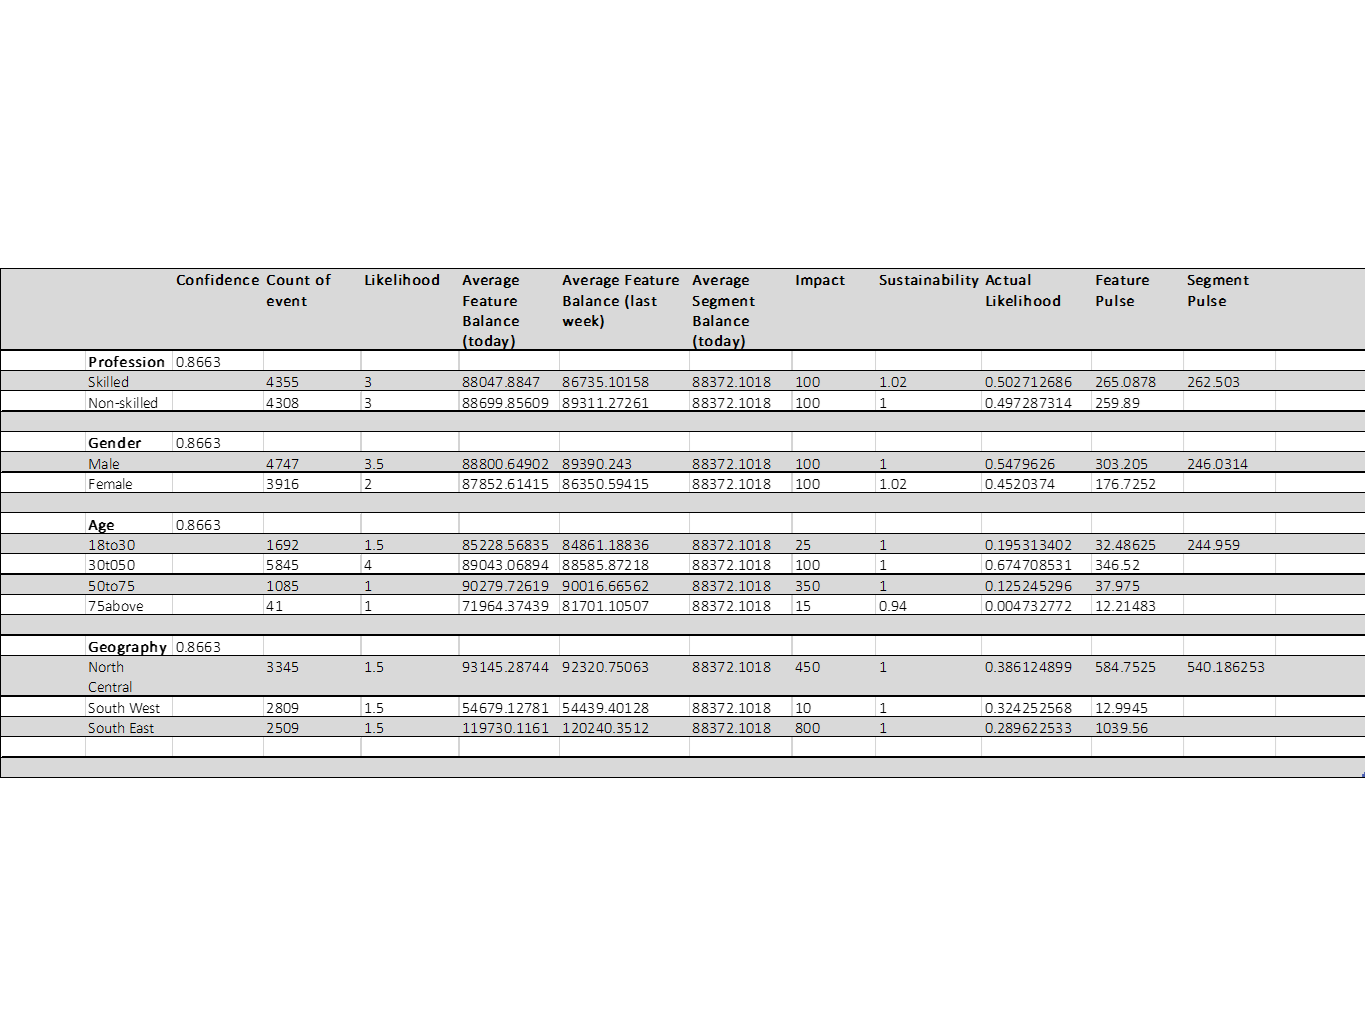

In [20]:
from IPython.display import Image
PATH = "C:\\Users\Brightness\Documents\Ope_pulse_test2.png"
Image(filename=PATH)

In [31]:
#validating calculations

"""

Take a look at a small data of customers aged 75, 
the number of customers with balance greater than zero that fall in this group is 41
and the number of customers with balance greater than zero last week is 38. 

"""

CustomersBalGreaterZerotodayData = rawData[rawData["Balance (today)"]>0] #segment data for today
CustomersBalGreaterZerolastweekData = rawData[rawData["Balance (last week)"]>0] #segment data for last week
fData= CustomersBalGreaterZerotodayData[CustomersBalGreaterZerotodayData["Age"]>75] # feature data today
flastweekData= CustomersBalGreaterZerolastweekData[CustomersBalGreaterZerolastweekData["Age"]>75]


"""

I will print the length and entire data of customers with balance greater than zero today.

"""

print(len(fData))
fData

41


,Geography,Gender,Age,Profession,Balance (last week),Balance (today)
553,North Central,Female,76,Skilled,118521.334252,160979.68
901,South West,Male,78,Skilled,134577.461801,151675.65
1010,South West,Male,77,Skilled,210636.905755,149083.70
1656,North Central,Female,76,Skilled,87373.790286,138489.66
1898,South East,Female,77,Non-Skilled,86508.113077,135120.56
1958,South West,Female,76,Skilled,178519.474780,134208.25
2255,South East,Male,76,Non-Skilled,125840.150230,130334.84
2424,South West,Male,76,Skilled,122623.405609,128410.71
2603,South West,Male,76,Non-Skilled,122133.456190,126534.60
2636,North Central,Male,92,Non-Skilled,161247.542976,126076.24


In [32]:
"""

I will print the length and entire data of customers with balance greater than zero last week.

"""
print(len(flastweekData))
flastweekData

38


,Geography,Gender,Age,Profession,Balance (last week),Balance (today)
553,North Central,Female,76,Skilled,118521.334252,160979.68
901,South West,Male,78,Skilled,134577.461801,151675.65
1010,South West,Male,77,Skilled,210636.905755,149083.70
1656,North Central,Female,76,Skilled,87373.790286,138489.66
1898,South East,Female,77,Non-Skilled,86508.113077,135120.56
1958,South West,Female,76,Skilled,178519.474780,134208.25
2255,South East,Male,76,Non-Skilled,125840.150230,130334.84
2424,South West,Male,76,Skilled,122623.405609,128410.71
2603,South West,Male,76,Non-Skilled,122133.456190,126534.60
2636,North Central,Male,92,Non-Skilled,161247.542976,126076.24


In [ ]:
"""

I will now summarise the data for last week and today categorised under age as above 75

"""

In [33]:
fData.describe() # average balance today value is 71964.373390

,Age,Balance (last week),Balance (today)
count,41.000000,41.000000,41.000000
mean,79.317073,75702.658360,71964.374390
std,4.131822,68032.236465,58457.901951
min,76.000000,0.000000,135.000000
25%,76.000000,241.000000,581.000000
50%,78.000000,80926.020000,87873.390000
75%,81.000000,125840.150230,123356.630000
max,92.000000,210636.905755,160979.680000


In [34]:
flastweekData.describe() #average balance last week is 81701.105073

,Age,Balance (last week),Balance (today)
count,38.000000,38.000000,38.000000
mean,79.263158,81701.105073,77542.509211
std,4.240629,67071.875696,57076.557110
min,76.000000,135.000000,0.000000
25%,76.000000,296.750000,270.500000
50%,78.000000,84217.864505,93647.315000
75%,80.000000,128028.612880,125396.337500
max,92.000000,210636.905755,160979.680000


I can confirm that the calculations in this notebook is 100% correct.